# H1-B Visa Data Exploration

[link to data set](https://public.enigma.com/datasets/h-1-b-visa-applications-2014/e1054732-9f56-4c5c-883f-5473f3a2d3d8)

First, the most basic step, I'll load the dataset into a pandas dataframe and understand the labels since they differ from the web interface a bit.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\Dat Tien Hoang\\Downloads\\db246968-e567-442f-8108-b86a280107d3.csv')
print list(df.columns)
df.head()

['lca_case_number', 'status', 'lca_case_submit', 'decision_date', 'visa_class', 'lca_case_employment_start_date', 'lca_case_employment_end_date', 'lca_case_employer_name', 'lca_case_employer_address', 'lca_case_employer_city', 'lca_case_employer_state', 'lca_case_employer_postal_code', 'lca_case_soc_code', 'lca_case_soc_name', 'lca_case_job_title', 'lca_case_wage_rate_from', 'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos', 'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state', 'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1', 'yr_source_pub_1', 'lca_case_workloc2_city', 'lca_case_workloc2_state', 'pw_2', 'pw_unit_2', 'pw_source_2', 'other_wage_source_2', 'yr_source_pub_2', 'lca_case_naics_code']


,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18,2014-09-29,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,OFLC ONLINE DATA CENTER,2013.0,ST. LOUIS,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0
1,I-200-09162-143337,CERTIFIED,2014-03-17,2014-03-21,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,OFLC ONLINE DATA CENTER,2013.0,INDIANAPOLIS,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0
2,I-200-09182-550211,DENIED,2014-03-14,2014-03-20,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,OFLIC ONLINE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330.0
3,I-200-09193-873099,CERTIFIED,2014-03-01,2014-03-06,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10,2014-03-17,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519.0


I realize that employers can file for many workers simultaneously, so to get a count by companies, I have to sum over rows grouped by employer names.

In [2]:
df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['total_workers'].sum().sort_values(ascending=False)[0:10]

lca_case_employer_name
PRICEWATERHOUSECOOPERS, LLP             5735.0
ERNST & YOUNG U.S. LLP                  2467.0
DELOITTE CONSULTING LLP                 2260.0
MPHASIS CORPORATION                     1736.0
DELOITTE & TOUCHE LLP                   1600.0
WIPRO LIMITED                           1150.0
CAPGEMINI FINANCIAL SERVICES USA INC    1124.0
TATA CONSULTANCY SERVICES LIMITED        915.0
IGATE TECHNOLOGIES INC.                  817.0
JPMORGAN CHASE & CO.                     627.0
Name: total_workers, dtype: float64

This was a good first pass at getting the top H-1B sponsors in New York City. I wondered though, about the consistency in the company names in the data. I scanned the dataframe for entries within the top 10 with portions of the company's name that I thought would be good consensus strings for that company. 

In [3]:
print (df[df['lca_case_employer_name'].str.contains('PRICE', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('ERNST', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('DELOITTE', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('MPHASIS', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('TOUCHE', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('WIPRO', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('CAPGEMINI', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('TATA', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('IGATE', case=False, na=False)])['lca_case_employer_name'].value_counts()
print (df[df['lca_case_employer_name'].str.contains('MORGAN', case=False, na=False)])['lca_case_employer_name'].value_counts()

PRICEWATERHOUSECOOPERS, LLP                      836
PRICEWATERHOUSECOOPERS LLP                        80
PRICELINE.COM                                     17
PRICELINE.COM LLC                                 17
T. ROWE PRICE ASSOCIATES, INC.                    11
PRICEWATERHOUSECOOPERS ADVISORY LLC                6
PRICETRACE LLC                                     5
FISHER-PRICE, INC.                                 5
PRICESPECTIVE LLC                                  3
PRICE FOR PROFIT                                   3
PRICE STATS LLC                                    2
VEDDER PRICE P.C.                                  2
PRICE AND ASSOCIATES CPAS, LLC                     2
SCHWEICHLER PRICE MULLARKEY & BARRY, INC.          2
PRICE GREGORY INTERNATIONAL                        1
BEST PRICE MATTRESS, INC.                          1
PRICE BENOWITZ, LLP                                1
PRICE KONG & CO., CPA'S, P.A.                      1
PRICE INDUSTRIES, INC.                        

There are quite a few variations of these top companies. This is an easy, yet tedious fix---I just have to reassign the labels that I picked out by eye. I had some difficulty however, since in some cases, it was unclear which entities should in fact be identical. For example, I could not tell the extent to which 'DELOITTE SERVICES LP' should be considered separately from 'DELOITTE CONSULTING LLP' (similarly, I get confused at my current company where my division is technically a separate legal entity though integrated with the parent company...). For this exercise, I only reassign small typos because I want to avoid making assumptions without further input from experts. 

Because of the time limitation, I only run this correction for the top 10 employers in New York City. In general, the ranking of employers is not expected to change much since in most cases only a small percentage of the company names are mismatched.

In [4]:
df.loc[(df['lca_case_employer_name'] == 'PRICEWATERHOUSECOOPERS LLP') &
       (df['lca_case_employer_name'] == 'PRICEWATERHOUSECOOPERS'),
       'lca_case_employer_name'] = 'PRICEWATERHOUSECOOPERS, LLP'
   
df.loc[(df['lca_case_employer_name'] == 'ERNST &AMP; YOUNG U.S. LLP') &
       (df['lca_case_employer_name'] == 'ERNST &AMP; YOUNG U.S. LLP') &
       (df['lca_case_employer_name'] == 'ERNST &YOUNG U.S. LLP') &
       (df['lca_case_employer_name'] == 'ERNST; YOUNG U.S. LLP') &
       (df['lca_case_employer_name'] == 'ERNST YOUNG U.S. LLP'), 
       'lca_case_employer_name'] = 'ERNST & YOUNG U.S. LLP'

df.loc[(df['lca_case_employer_name'] == 'DELOITTECONSULTING LLP'), 
       'lca_case_employer_name'] = 'DELOITTE CONSULTING LLP'

df.loc[(df['lca_case_employer_name'] == 'DELOITTE &AMP; TOUCHE LLP') &
       (df['lca_case_employer_name'] == 'DELOITTE &TOUCHE LLP') &
       (df['lca_case_employer_name'] == 'DELOITTE TOUCHE LLP') &
       (df['lca_case_employer_name'] == 'DELOITTE &; TOUCHE LLP'), 
       'lca_case_employer_name'] = 'DELOITTE & TOUCHE LLP'

df.loc[(df['lca_case_employer_name'] == 'WIPRO LTD'), 
       'lca_case_employer_name'] = 'WIPRO LIMITED'

df.loc[(df['lca_case_employer_name'] == 'CAPGEMINI FINANCIAL SERVICES USA INC.'), 
       'lca_case_employer_name'] = 'CAPGEMINI FINANCIAL SERVICES USA INC'

df.loc[(df['lca_case_employer_name'] == 'JPMORGAN CHASE &AMP; CO.') &
       (df['lca_case_employer_name'] == 'JPMORGAN CHASE & CO') &
       (df['lca_case_employer_name'] == 'JPMORGAN CHASE CO.') &
       (df['lca_case_employer_name'] == 'JPMORGAN CHASE &AMP; CO') &
       (df['lca_case_employer_name'] == 'JPMORGAN CHASE &CO.'), 
       'lca_case_employer_name'] = 'JPMORGAN CHASE & CO.'

Now I'll quickly update the counts after fixing the employer names...

In [5]:
df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['total_workers'].sum().sort_values(ascending=False)[1:10]

lca_case_employer_name
ERNST & YOUNG U.S. LLP                  2467.0
DELOITTE CONSULTING LLP                 2260.0
MPHASIS CORPORATION                     1736.0
DELOITTE & TOUCHE LLP                   1600.0
WIPRO LIMITED                           1150.0
CAPGEMINI FINANCIAL SERVICES USA INC    1125.0
TATA CONSULTANCY SERVICES LIMITED        915.0
IGATE TECHNOLOGIES INC.                  817.0
JPMORGAN CHASE & CO.                     627.0
Name: total_workers, dtype: float64

As expected, the ranking doesn't change much as only one company changed rank (Deloitte and Touche LLP).

Next, I want to compare the pay for H-1B workers in New York City and Mountain View. I first realized that there are different units for pay (hourly, monthly, weekly, bi-weekly). I first wanted to standardize all of these to an annual pay scale. For this, I performed a naive assume assuming a 40hr work week, for 52 weeks a year. In addition, in some cases, the worker's pay exists within a range. I naively average the pay range since I have no prior knowledge about the most likely value from the range.

In [6]:
df['AnnualizedPay1'] = pd.to_numeric(df['lca_case_wage_rate_from'])
df.loc[df['lca_case_wage_rate_unit'] == 'Hour', 'AnnualizedPay1'] *= 2080
df.loc[df['lca_case_wage_rate_unit'] == 'Month', 'AnnualizedPay1'] *= 12
df.loc[df['lca_case_wage_rate_unit'] == 'Week', 'AnnualizedPay1'] *= 52
df.loc[df['lca_case_wage_rate_unit'] == 'Bi-Weekly', 'AnnualizedPay1'] *= 26
df.loc[df['lca_case_wage_rate_unit'] == np.nan, 'AnnualizedPay2'] = np.nan
df['AnnualizedPay2'] = pd.to_numeric(df['lca_case_wage_rate_to'])
df.loc[df['lca_case_wage_rate_unit'] == 'Hour', 'AnnualizedPay2'] *=  2080
df.loc[df['lca_case_wage_rate_unit'] == 'Month', 'AnnualizedPay2'] *= 12
df.loc[df['lca_case_wage_rate_unit'] == 'Week', 'AnnualizedPay2'] *= 52
df.loc[df['lca_case_wage_rate_unit'] == 'Bi-Weekly', 'AnnualizedPay2'] *= 26
df.loc[df['lca_case_wage_rate_unit'] == np.nan, 'AnnualizedPay2'] = np.nan
df['AnnualizedPay'] = (df[['AnnualizedPay1','AnnualizedPay2']]).mean(axis=1, skipna=True)

df.head()

,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,...,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,AnnualizedPay1,AnnualizedPay2,AnnualizedPay
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18,2014-09-29,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0,50000.0,60000.0,55000.0
1,I-200-09162-143337,CERTIFIED,2014-03-17,2014-03-21,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0,65000.0,NaN,65000.0
2,I-200-09182-550211,DENIED,2014-03-14,2014-03-20,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,541330.0,50000.0,NaN,50000.0
3,I-200-09193-873099,CERTIFIED,2014-03-01,2014-03-06,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,333922.0,48000.0,NaN,48000.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10,2014-03-17,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,NaN,NaN,NaN,NaN,NaN,NaN,541519.0,62000.0,NaN,62000.0


I can quickly use numpy to calculate the mean and standard deviation of proposed pay for H-1B applicants in New York City vs. Mountain View. I also coudl have used pandas. For this exercise, I will only focus on primary work location.

In [7]:
print 'New York City:'
print 'mean, stdev: (1)', np.nanmean(df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'AnnualizedPay']), np.nanstd(df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'AnnualizedPay'])
print 'Mountain View:'
print 'mean, stdev: (1)', np.nanmean(df.loc[df['lca_case_workloc1_city'] == 'MOUNTAIN VIEW', 'AnnualizedPay']), np.nanstd(df.loc[df['lca_case_workloc1_city'] == 'MOUNTAIN VIEW', 'AnnualizedPay'])

New York City:
mean, stdev: (1) 185515.956366 3972779.13273
Mountain View:
mean, stdev: (1) 387444.61214 7643072.42869


It would appear that the proposed mean pay in New York City is much higher than those in Mountain View. However, I am a bit suspicious of the large standard deviations. I always like to visualize things before quantifying them just to develop an intuition for the data. I tried several methods of visualizations. For brevity, I do not show the visualizations that didn't work well, but mention them below:
1. First, I want to tried making a kernal density estimate of probability density distribution of worker's pay in these two regions. These KDE plots look pretty terrible and scraggly with random peaks. This is typically indicative of a dataset with many outliers, or data that is spread very thinly. Data not shown.
2. Next, I tried violin plots, which were really stretched too thin, again because of outliers.
3. Finally I settled on box plots...

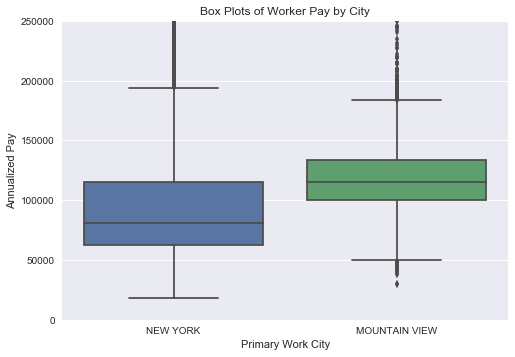

In [8]:
ax = sns.boxplot(x="lca_case_workloc1_city", y="AnnualizedPay",
                 data=df[(df['lca_case_workloc1_city'] == 'NEW YORK') | (df['lca_case_workloc1_city']=='MOUNTAIN VIEW')])
#ax = sns.swarmplot(x="lca_case_workloc1_city", y="AnnualizedPay",
#                 data=df[(df['lca_case_workloc1_city'] == 'NEW YORK') | (df['lca_case_workloc1_city']=='MOUNTAIN VIEW')])
ax.set_title('Box Plots of Worker Pay by City')
ax.set_ylim(0,250000)
ax.set(xlabel='Primary Work City', ylabel='Annualized Pay')
plt.show()

To test whether or not the difference between these means are statistically significant, I'm going to opt for an independent two-sample t-test. I know from earlier that the samples sizes are different. I do not want to assume that the variances in New York City and Mountain View are identical because my prior knowledge about the economic drivers of these two cities are different, they may have unidentical distributions of worker's pay. Hence, Welch's t-test would be the most appropriate t-test.

Within the scipy, Welch's t-test is computed by setting the "equal_var" keyword to False within the "ttest_ind" function.

In [9]:
from scipy.stats import ttest_ind
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
Welchs = ttest_ind(df.loc[(df['lca_case_workloc1_city'] == 'NEW YORK'), 'AnnualizedPay'], 
                   df.loc[(df['lca_case_workloc1_city'] == 'MOUNTAIN VIEW'), 'AnnualizedPay'], 
                   equal_var=False)
print 't-statistic: ', Welchs.statistic
print 'p-value: ', Welchs.pvalue

t-statistic:  -1.88421208785
p-value:  0.0595862751329


We have a high p-value (high typically meaning higher than 0.05 or 0.1), which suggests that we can not reject the null hypothesis. Therefore the differences in pay between New York City and Mountain View are not statistically significant!

To understand the relationship between visas requested and average wage proposed, I think a simple ordinary least squares regression will do. I'll first do one qualitatively in seaborn to get an intuition for the data, and then run a fit that produces numbers using statsmodels. 

I decided to investigate this problem in two ways, since the wording was ambiguous to me. This is because the same employer can appear over multiple rows within this dataset. In the first regression, I forego grouping by employer, while in the second I perform the grouping of employers over all the rows. 

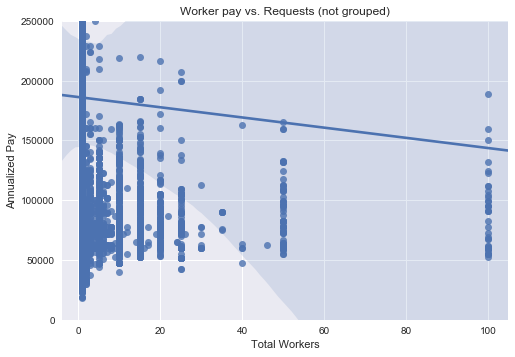

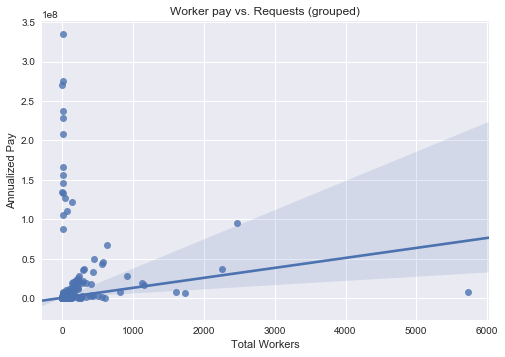

In [10]:
ax = sns.regplot(df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'total_workers'], 
                 df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'AnnualizedPay'])
ax.set_title('Worker pay vs. Requests (not grouped)')
ax.set(xlabel='Total Workers', ylabel='Annualized Pay')
ax.set_ylim(0,250000)
plt.show()

ax = sns.regplot(df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['total_workers'].sum(), 
                 df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['AnnualizedPay'].sum())
ax.set_title('Worker pay vs. Requests (grouped)')
ax.set(xlabel='Total Workers', ylabel='Annualized Pay')
plt.show()

It looks like there is some sort of relationship between number of employees. Qualitatively, it doesn't look like a great fit, but let's put some numbers to it. An ordinary least squares regression (OLS) might just do the trick, and is availible in sci-kit learn or statsmodels. Personally, I prefer the statsmodels toolkit because it gives you control over the design matrices, and provides more statistical measures for me to evaluate (with an output similar to R), but they should provide the same fit result.

In [11]:
import statsmodels.api as sm
# Note the swap of X and y compared to sci-kit learn conventions!
model = sm.OLS(df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'total_workers'], 
               np.vander(df.loc[df['lca_case_workloc1_city'] == 'NEW YORK', 'AnnualizedPay'],2))
results = model.fit()
print results.summary()

model = sm.OLS(df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['total_workers'].sum(), 
               np.vander(df[df['lca_case_workloc1_city'] == 'NEW YORK'].groupby('lca_case_employer_name')['AnnualizedPay'].sum(),2))
results = model.fit()
print results.summary()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:          total_workers   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.008994
Date:                Sun, 20 Aug 2017   Prob (F-statistic):              0.924
Time:                        23:00:02   Log-Likelihood:                -96691.
No. Observations:               32068   AIC:                         1.934e+05
Df Residuals:                   32066   BIC:                         1.934e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.578e-10   6.94e-09     -0.095      0.9

Depending on how we approach the problem, we get different results:
1. When we don't group by employers we have a low R-squared on the fit, and a very high p-value (> 0.05) on the explanatory variable (total workers). This means the model doesn't explain much of the variation, and that total workers is not a significant indicator of proposed pay.

1. On the other hand, when we group by employers, we have a low R-squared on the fit, and a low p-value on the explanatory variable (total workers). This means the model doesn't explain much of the variation, but the relationship between total workers and proposed pay is significant!


Next I wondered what questions this dataset can answer. I got a feel for the socio-political issues and concerns surrounding the visa program by reading the (wikipedia page)[https://en.wikipedia.org/wiki/H-1B_visa]. Some quesions I thought of are below. 


1. Is there really a labor shortage to fill?
    - Given the current poltical climate and debate about restricting H-1B's, this is probbably the most interesting question for me. Of the ideas brainstormed here, this is the least doable because it woule require a lot of additional datasets that are not readily availible. 
    - I would need information about the rate of job growth by occupation, with matching SOC codes, and information about how many employees are attaining credentials that make them eligible for these occupations. Creating relationships between these two hypothetical datasets would be difficult even if they existed because we would also have to attain a mapping of qualifying credentials for each occupation (a simplistic example is that a practicing physician can have either an M.D. or a D.O.).
    - From here, a linear model could work well. We can do just one regression using a linear mixed model (such as GLMM) to consider the hierarchical nature of this data. 

2. Which H-1B applicants will eventually elect to acquire permanent immigrant status?
    - This would require additional datasets outside of the one used for this data challenge. Namely, there is a dataset for this on [Enigma Public](https://public.enigma.com/datasets/permanent-visa-applications-2014/f3d32c4d-42ba-4c26-9e72-66fc88b1f7e4?&filter=%2B%5B%3E%5Bpermanent%20visa%202014%5D%5D) which outlines a visa holder's . However, the case numbers don't appear to match up between these two datasets (LCA Case Numbers and Case Numbers).
    - In addition, the statuses in the H-1B application dataset only specify if the application is "certified", which is actually a prerequisite to H-1B approval, rather than approval itself. Meaning that even if the case numbers matched between the two datasets, there would still be this disconnect.
    - If the data were availible, various classification methods, such as k-Nearest Neighbors, random forest, or gradient boosted trees (within sci-kit learn or xgboost) can be engineered to identify H-1B holders likely to apply for permanent status.

3. Can we identify willful violators of the regulations surrounding the H-1B program?
    - This would require the willfull violators dataset in Enigma Public
    - Though not shown in this notebook, I found that only a couple willful violators appear in the 2014 dataset. Thus with the data limited we might not be able to find any meaningful indicators.

4. Is there a racial bias in attaining 'Certified' status? What about biases in occupation or income levels?
    - This would require the dataset to contain the country of origin. In this dataset however, the only specified countries are those with special visa classes (Australia, Chile, and Singapore).
    - To understand this, we can look at differing statuses by country, but would also have to consider the breakdown of occupations that might be specific to the country of origin. Again, this data is hierarchal so a mixed model might be appropriate. 

5. What features in general are indicative of a positive outcome?
    - There are many techniques that would provide feature importances. For example, this problem can be framed as a two-class classification problem. Many applicable decision trees (such as a random forest classifier as provided in sci-kit learn as well as extreme gradient boosted trees as implemenmted in xgboost) can provide feature importances. If the solution requires a continuous outcome, we can perform a logistic regression on this problem. As with any basic regression method, we can determine which features are important using stepwise regression or similar techniques. In Python, this is called an F-regression or recursive feature elimination in sci-kit learn. 
    - However, majority of the outcomes are positive (almost all of the applications are 'Certified'), which makes this a less interesting direction for me. 

6. There was a ('Trump Effect' on green card applications)[http://www.npr.org/2017/02/21/516375460/green-card-holders-worry-about-trump-s-efforts-to-curtain-immigration], where applications spiked because of post-election political uncertainties. Was there a 'Trump Effect' on H-1B applications as well? Is there general seasonality with presidential elections?
    - To explore this, we would need to produce a time-series of H-1B applications, and their outcomes. This is possible since Enigma Public provides similar datasets as that use earlier in this notebook (I imagine it may just require simple filtering to eliminate duplicates, I never checked). 
    - Within Enigma Public, we have data from 2007-2016, so this is entrely feasible.  
    - Basically, this problem boils down to a problem of event (or novelty or outlier) detection. There are several methods for detecting events on a time series (Kalman filtering, ARIMA modeling and variants thereof, moving average analysis, classification). Most of these methods rely on defining some range (for example, 2.5 standard deviations away from the moving average of the time series) which requires debate and input from those with domain knowledge.

7. The US offers several programs specifically tailored to certain foreign nationals as part of certain free trade treaties (E-3's for Australians and H-1B1's for Singaporeans and Chileans). Does the dataset reflect any advantage these applicants have  
    - I was interested in this because of a [Gothamist article(http://gothamist.com/2014/06/09/australians_everywhere.php) that wondered why there are a lot of Australians in New York City. They attribute this to the visa leniency. Though Singapore and Chile also benefit from similar programs I was wondering why we don't see many Singaporeans and Chileans (and yes, they are smaller countries, but we would see a proportional amount perhaps).
    - I could look at survival (or duration) analysis to decision time to gauge of their visas are expdited.
    - We can also investigate the distribution of occupations between these cohorts, liklihood of approval, etc.

8. Some critics of the H-1B program claim that it is leveraged for unfair [wage depression](https://en.wikipedia.org/wiki/H-1B_visa#Wage_depression). Is there any evidence for this?
    - An additional dataset that might be required would be one that contains the distributions of worker's wages
    - This will require an analysis on pay distributions between H-1B holders and a national dataset of some form
    - I chose to address this question, and there is more discussion on this in Section 3. 

I was particularly interested in investigating the extend of wage depression in H-1B applicants relative to the industry mean. I am choosing to not consider the prevailing wages in this dataset because critics of the H-1B visa program claim that employers have too much [control over defining the prevailing wage](), and can use them as a method to depress wages. 

First, I want to inspect proposed wages by major division of SOC codes because some of the background reading I've done suggests that wage depression [may affect certain fields more acutely]() than others. [SOC codes are formatted](https://www.bls.gov/soc/soc_structure_2010.pdf) such that the first two numbers represent a major group of occupations (ranging from 11 to 50, odd numbers), followed by a hyphen and 4 digits, representing minor groupings which offer specific information on the occupation. 

To investigate the presence of wage depression, I want to look at distributions of proposed pay. My reasoning is that if wages are depressed, we might see significant skew in this distribution. Skewness is defined as an asymmetry in a probability distribution function (illustrated below). In the case of widespread wage depression, one might expect positive skew (left-leaning).

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/669px-Negative_and_positive_skew_diagrams_%28English%29.svg.png)

First, I inspect the SOC occupation codes to see if there were any anomalies or cleaning that I need to do. Within the cell below, I comment some suspicious entries for conciseness.

In [12]:
df['lca_case_soc_code'].unique()
# very suspicious:
# 1933-11-01, 2011-11-01, 2022-11-01, 1999-11-01, 1961-11-01, 2013-11-01, 1971-11-01, 1951-11-01, 1931-11-01, 
# 1941-11-01, 2021-11-01, 1131, 2, nan, 
# less suspicious, but noteworthy:
# 119121, 1501121, 291066, 291051, 151031, 252021, 291127, 151132, 151131, 2911123, 291063,
# 151121, 191021, 131161, 131161, 151142, 112021, 291069, 151199, 291062, 172072, 1702141, 271011, 
# 273091, 292011, 291122, 192031, 132011, 151133, 152031, 131081, 151141, 113021, 291131, 172141, 192032, 
# 251022, 351011, 172071, 171012, 113061, 132051, 111021, 152041, 151150, 191042, 113031

array(['19-1029', '29-1041', '27-2011', ..., '53-1021', '51-4011',
       '27-1023'], dtype=object)

It seems I need to do a little but of cleaning using a bit of judgement. I am suspicious of the entries whose codes don't begin with two digits. There are others who dont follow the xx-xxxx.xx format of the SOC Code. I am less suspicious of some of these as it seems they either forego the dash in place of a '/', '.', '0', or nothing quite systematically. I am highly suspicious of codes whos first two numbers comprise an even number, since all SOC major codes are odd numbers. 

In [13]:
df = df[(df['lca_case_soc_code'] != '1933-11-01') & 
        (df['lca_case_soc_code'] != '2011-11-01') & 
        (df['lca_case_soc_code'] != '2022-11-01') & 
        (df['lca_case_soc_code'] != '1999-11-01') & 
        (df['lca_case_soc_code'] != '1961-11-01') &
        (df['lca_case_soc_code'] != '2013-11-01') &
        (df['lca_case_soc_code'] != '1971-11-01') &
        (df['lca_case_soc_code'] != '1951-11-01') &
        (df['lca_case_soc_code'] != '1931-11-01') &
        (df['lca_case_soc_code'] != '1941-11-01') &
        (df['lca_case_soc_code'] != '2021-11-01') &
        (df['lca_case_soc_code'] != '1131') &
        (df['lca_case_soc_code'] != '2') &
        (df['lca_case_soc_code'] != 'nan')] 

Now, calculating the skew of worker's pay grouped by SOC major code is pretty straightforward as pandas has a built in method for calculating the bias-corrected (aka, unbiased) skewness.

In [14]:
df['SOC_trunc'] = [str(x)[0:2] for x in df['lca_case_soc_code']]
df = df[(df['SOC_trunc'] != '14') & 
        (df['SOC_trunc'] != '24') & 
        (df['SOC_trunc'] != '60') & 
        (df['SOC_trunc'] != 'na')]
print df.groupby('SOC_trunc')['AnnualizedPay'].skew(skipna=True).sort_values(ascending=False)

SOC_trunc
15    506.610337
13    215.813886
17     92.394472
25     77.065651
29     62.048028
19     55.877686
41     52.886273
11     51.667737
27     51.275664
23     44.050713
45     11.356047
43      9.651750
21      8.119929
51      4.782200
53      2.449403
39      1.982467
47      1.840307
35      1.395846
37      1.385441
31      1.126126
33      1.065934
49      0.748293
Name: AnnualizedPay, dtype: float64


Skew, as calculated by pandas, is the bias-corrected skew. On this scale, it is generally considered that a skew between $\pm$1 is considered mildly skewed, while anything above is considered heavily skewed. I notice that all fields have positive skew, with most occupations echibiting significant skew!

To get an intuition for these skewness values, I'm going to quickly plot a kernel density estimate of SOC Code 15 (Computer and Mathematical Operations, heavily skewed) and SOC Code 33 (Protective Service Occupations, slightly skewed)

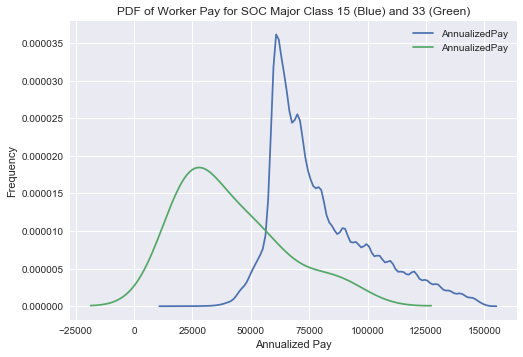

In [15]:
ax = sns.kdeplot(df.loc[(df['SOC_trunc'] == '15') & (df['AnnualizedPay'] < 150000), 'AnnualizedPay'])
ax = sns.kdeplot(df.loc[(df['SOC_trunc'] == '33') & (df['AnnualizedPay'] < 150000), 'AnnualizedPay'])
ax.set_title('PDF of Worker Pay for SOC Major Class 15 (Blue) and 33 (Green)')
ax.set(xlabel='Annualized Pay', ylabel='Frequency')
plt.show()

The observed skews should be compared with skews in wage distributions nationally. 

Because BLS doesn't offer wage information by SOC codes more granularly than quantiles, I'm going to have to re-evaluate how I approach. One can actually also calculate skewness using quantiles, called Bowley's Skewness. 

$ \mathrm{BowleySkewness} = \frac{Q_1 + Q_3 - 2Q_2}{Q_3 - Q_1} $

which ranges from $[0, 1)$ with zero indicating no skew and maximumly skewed as the measure approaches one. Next, I wanted to make sure that the unbiased skewnesses were also reflected in the medians and quantiles of worker's pay by major SOC code.

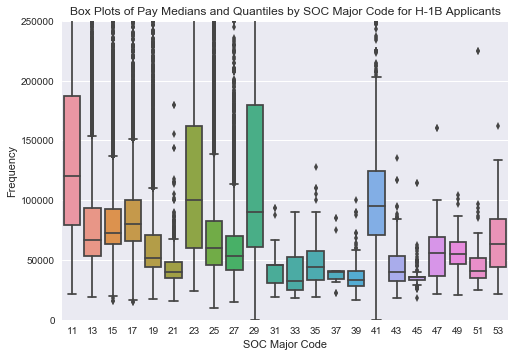

In [16]:
temp = df.copy()
temp = temp[(temp['SOC_trunc'] != '14') & (temp['SOC_trunc'] != '24') & (temp['SOC_trunc'] != '60') & (temp['SOC_trunc'] != 'na')]
ax = sns.boxplot(x="SOC_trunc", y="AnnualizedPay", data=temp)
ax.set_title('Box Plots of Pay Medians and Quantiles by SOC Major Code for H-1B Applicants')
ax.set(xlabel='SOC Major Code', ylabel='Frequency')
ax.set_ylim(0,250000)
plt.show() 

These box plots reveal that quantiles can still capture the skewness. I can extract the quantiles using pandas. Let's start by looking at Major Group 15 subset of our dataset. First, I'll write a quick function that can return Bowley's skewnesses from quantiles.

In [17]:
def quantileskew(quantiles, source):
    if (quantiles[3] - quantiles[2]) > (quantiles[2] - quantiles[1]):
        status = '...positive skew'
    else:
        status = '...negative skew'
    print 'Bowleys Skewness ' + source + ': ', ((quantiles[3] + quantiles[1] - 2.*(quantiles[2])) / 
                                   (quantiles[3] - quantiles[1])), '    ' + status

print 'quantiles of SOC Major Group 15 (Computer and Mathematical):'
quantiles = temp.loc[temp['SOC_trunc'] == '15', 'AnnualizedPay'].quantile([0.1,0.25,0.5,0.75,0.9])
quantileskew(quantiles.values, 'H1B')

quantiles of SOC Major Group 15 (Computer and Mathematical):
Bowleys Skewness H1B:  0.335167447864     ...positive skew


From the BLS, we get the quantiles for SOC major group 15 as well, from which we can compute Bowley's skewness. For now, these are just copy pasted from the [BLS website](https://www.bls.gov/oes/2014/may/oes_stru.htm).

In [18]:
# SOC Code 15 (), 2014
print 'quantiles of SOC Major Group 15 (Computer and Mathematical) Continued:'
quantiles = [41130., 56920., 79420., 106330., 134500.]
quantileskew(quantiles, 'BLS')

quantiles of SOC Major Group 15 (Computer and Mathematical) Continued:
Bowleys Skewness BLS:  0.0892531876138     ...positive skew


For computer and mathematical jobs, we see that the national pay distribution has small skew, while that for H-1B applicants have a significant skew! This is evidence of wage depression (at least for computer and mathematical workers)!

Next I wondered how skewnesses compare for other SOC major codes. Specifically, I looked at some other fields that exhibited high skew:
1. 21: 'Community and Social Service Occupations'
1. 29: 'Healthcare Practitioners and Technical Occupations'

and some that exhibit only mild skew:
1. 33: 'Protective Service Occupations'
1. 49: 'Installation, Maintenance, and Repair Workers'

In [19]:
# SOC Code 21 (Community and Social Service Occupations), 2014
print 'quantiles of SOC Major Group 21 (Community and Social Service Occupations):'
quantiles = temp.loc[temp['SOC_trunc'] == '21', 'AnnualizedPay'].quantile([0.1,0.25,0.5,0.75,0.9])
quantileskew(quantiles.values, 'H1B')
quantiles = [23990., 31190., 41290., 56290., 73250.]
quantileskew(quantiles, 'BLS')

# SOC Code 29 (Healthcare Practitioners and Technical Occupation), 2014
print 'quantiles of SOC Major Group 29 (Healthcare Practitioners and Technical Occupations):'
quantiles = temp.loc[temp['SOC_trunc'] == '29', 'AnnualizedPay'].quantile([0.1,0.25,0.5,0.75,0.9])
quantileskew(quantiles.values, 'H1B')
quantiles = [31570., 43920., 61710., 87840., 133600.]
quantileskew(quantiles, 'BLS')

# SOC Code 33 (Protective Service Occupations), 2014
print 'quantiles of SOC Major Group 33 (Protective Service Occupations):'
quantiles = temp.loc[temp['SOC_trunc'] == '33', 'AnnualizedPay'].quantile([0.1,0.25,0.5,0.75,0.9])
quantileskew(quantiles.values, 'H1B')
quantiles = [19090., 24510., 37180., 57270., 80360.]
quantileskew(quantiles, 'BLS')

# SOC Code 49 (Installation, Maintenance, and Repair Workers), 2014
print 'quantiles of SOC Major Group 49 (Installation, Maintenance, and Repair Workers):'
quantiles = temp.loc[temp['SOC_trunc'] == '49', 'AnnualizedPay'].quantile([0.1,0.25,0.5,0.75,0.9])
quantileskew(quantiles.values, 'H1B')
quantiles = [23220., 30980., 42110., 57060., 72560.]
quantileskew(quantiles, 'BLS')

quantiles of SOC Major Group 21 (Community and Social Service Occupations):
Bowleys Skewness H1B:  0.150746268657     ...positive skew
Bowleys Skewness BLS:  0.195219123506     ...positive skew
quantiles of SOC Major Group 29 (Healthcare Practitioners and Technical Occupations):
Bowleys Skewness H1B:  0.512602499828     ...positive skew
Bowleys Skewness BLS:  0.189890710383     ...positive skew
quantiles of SOC Major Group 33 (Protective Service Occupations):
Bowleys Skewness H1B:  0.455704957494     ...positive skew
Bowleys Skewness BLS:  0.226495726496     ...positive skew
quantiles of SOC Major Group 49 (Installation, Maintenance, and Repair Workers):
Bowleys Skewness H1B:  0.0989010989011     ...positive skew
Bowleys Skewness BLS:  0.146472392638     ...positive skew


I notice that (at least for the ones I've tested), the skews are all positive, which is a nice feature since it agrees with the all positive skewnesses we calculated using the unbiased estimator. This makes sense given that most occupations are not management heavy, and thus I might expect pay distributions to be more likely positively skewed than not. 

Comparing the skews between the H-1B applicant dataset and BLS data shows some interesting patterns. Al the major code occupations (asides from one) exhibit more skewness in the H-1B dataset than the BLS, the exception being Social Service occupations.

In theory, one could perform this for all the major codes by building a webscraper to mine the quantiles from the BLS website. For me however, it would take a bit more time to build my first web scraper than would be allotted by the time constraint. This would allow us to develop a model for identifying occupations that are more likely to engage in wage depression.

Some interesting directions include developing a model for flagging possible companies that are engaging in wage depression. This would ideally incorporate BLS data, so we can get more detailed probability distribution functions (PDF) of proposed pay for each occupation. One possible direction to creating these flags is to identify companies along portions of the PDF in the H-1B dataset that do not overlap with that for the BLS dataset. 